In [1]:
%%capture

#standard libraries
import os
import pandas as pd
import numpy as np
import regex as re

#for visuals
import matplotlib.pyplot as plt

#for coordinate conversion
!pip install utm
import utm

#for scaling the coordinates
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,3.4))


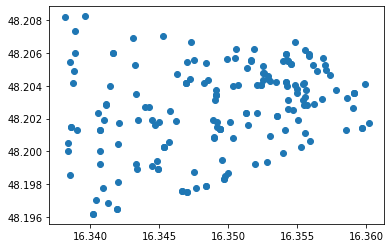

In [5]:
df = pd.read_csv('./data/district_data.csv', sep= ";")

plt.scatter(x=df["LONG"], y=df["LAT"])

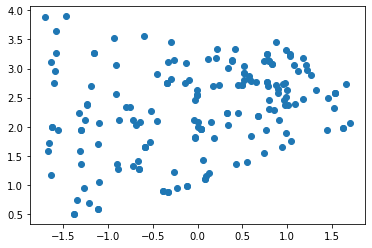

In [6]:

import pyproj
from shapely.geometry import Point

# Create a projection 
# in Web Mercator the same that leaflet uses which was used for the 2D application
project = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

row_counter = 0
x_coordinates = []
y_coordinates = []
for i in df.iterrows():
    
    x_y = project.transform(df.iloc[row_counter]["LONG"], df.iloc[row_counter]["LAT"])
    x = x_y[0]
    y = x_y[1]
    x_coordinates.append(x)
    y_coordinates.append(y)
    row_counter += 1
    
df["X_coord"] = x_coordinates
df["Y_coord"] = y_coordinates


df[['X_coord', 'Y_coord']] = scaler.fit_transform(df[['X_coord', 'Y_coord']])
df["Y_coord"]  =  df["Y_coord"]+0.5
df["X_coord"]  =  df["X_coord"]-1.7

plt.scatter(df["X_coord"], df["Y_coord"])

In [7]:
df["scale"] = 0

df.loc[df["TYPE"] == "church", "scale"] = "0.018 0.036 0.018"
df.loc[df["TYPE"] == "farm", "scale"] = "0.014 0.0145 0.014"
df.loc[df["TYPE"] == "settlement", "scale"] = "0.2 0.2 0.2"
df.loc[df["TYPE"] == "building", "scale"] = "0.003 0.003 0.003"
df.loc[df["TYPE"] == "cinema", "scale"] = "0.02 0.02 0.02"
df.loc[df["TYPE"] == "coffee_house", "scale"] = "0.002 0.002 0.002"
df.loc[df["TYPE"] == "health_institution", "scale"] = "0.05 0.05 0.05"
df.loc[df["TYPE"] == "ns_institution", "scale"] = "0.1 0.1 0.1"
df.loc[df["TYPE"] == "park", "scale"] = "0.005 0.005 0.005"
df.loc[df["TYPE"] == "school", "scale"] = "0.006 0.006 0.006"
df.loc[df["TYPE"] == "statue", "scale"] = "0.01 0.01 0.01"
df.loc[df["TYPE"] == "theatre", "scale"] = "0.04 0.04 0.04"

df["delay_appearance"] = (df["DATUM_VON"] -1280) *1000
df["delay_vanishing"] = (df["DATUM_BIS"] -1280) *1000

In [8]:
df[df["TYPE"] == "theatre"]

,SEITENNAME,TYPE,DATUM_VON,DATUM_BIS,BENANNT_NACH,STREET,DISTRICT,SHAPE,WEBLINK1,LONG,LAT,X_coord,Y_coord,scale,delay_appearance,delay_vanishing
82,Theater der Jugend,theatre,1932,0,NaN,Neubaugasse 36/1,7,POINT (16.3494000247669 48.20136633307758),https://www.geschichtewiki.wien.gv.at/?curid=2...,16.349400,48.201366,0.034188,1.960508,0.04 0.04 0.04,652000,-1280000
97,Renaissancetheater,theatre,1912,0,NaN,Neubaugasse 36/1,7,POINT (16.3494000247669 48.20136633307758),https://www.geschichtewiki.wien.gv.at/?curid=2...,16.349400,48.201366,0.034188,1.960508,0.04 0.04 0.04,632000,-1280000
122,Volkstheater,theatre,1889,0,Verein des Deutschen Volkstheaters,Arthur-Schnitzler-Platz 1,7,POINT (16.357053732725316 48.20523201309908),https://www.geschichtewiki.wien.gv.at/?curid=6125,16.357054,48.205232,1.213144,3.053281,0.04 0.04 0.04,609000,-1280000


In [9]:
for i, n in enumerate(df.iterrows()):
    code='''<a-entity gltf-model="#{0}"   
    position="{1} -1 {2}" 
    animation="property: position; to:{1} 0.12 {2}  
    dur: 1000; easing: linear; loop: false; delay:{3}" '''.format(str(df.iloc[i]["TYPE"]), 
                                                                  str(df.iloc[i]["X_coord"]), 
                                                                  str(-df.iloc[i]["Y_coord"]), 
                                                                  str(df.iloc[i]["delay_appearance"]))
    
    if df.iloc[i]["delay_vanishing"] > 0:
        code+='''
        animation__2="property: position; to:{0} -1 {1}
        dur: 1000; easing: linear; loop: false; delay:{2}" '''.format(str(df.iloc[i]["X_coord"]),
                                                                   str(-df.iloc[i]["Y_coord"]),
                                                                   str(df.iloc[i]["delay_vanishing"]))
    else:
        pass
    
    if df.iloc[i]["TYPE"] =="church":
        code+=''' rotation="0 -40 0" '''
    else:
        if df.iloc[i]["TYPE"] =="theatre":
            code+=''' rotation="0 90 0" '''
        else:
            pass
            
    
    code+='scale="{0}"></a-entity>'.format(str(df.iloc[i]["scale"]))
    print(code)

<a-entity gltf-model="#park"   
    position="-0.5335935804843757 -1 -1.7388099749714456" 
    animation="property: position; to:-0.5335935804843757 0.12 -1.7388099749714456  
    dur: 1000; easing: linear; loop: false; delay:727000" scale="0.005 0.005 0.005"></a-entity>
<a-entity gltf-model="#statue"   
    position="0.522505476819606 -1 -2.920090252226146" 
    animation="property: position; to:0.522505476819606 0.12 -2.920090252226146  
    dur: 1000; easing: linear; loop: false; delay:470000" scale="0.01 0.01 0.01"></a-entity>
<a-entity gltf-model="#health_institution"   
    position="0.5926097250742715 -1 -2.7869558368456637" 
    animation="property: position; to:0.5926097250742715 0.12 -2.7869558368456637  
    dur: 1000; easing: linear; loop: false; delay:433000" scale="0.05 0.05 0.05"></a-entity>
<a-entity gltf-model="#health_institution"   
    position="0.793053964682531 -1 -2.2967512680716027" 
    animation="property: position; to:0.793053964682531 0.12 -2.296751268071602